# Data analysis for the maxplus paper

In [6]:
import pandas as pd
import numpy as np
import numpy.ma as ma
import json
from scipy import stats
from scipy.special import loggamma
from datetime import date, datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import MaxNLocator
plt.rcParams.update({'font.size': 12})
import warnings
warnings.filterwarnings("ignore")

In [38]:
marker = ['-', '--', '-.', ':', '', ...]
def get_marker(i,marker):
    j = i % len(marker)
    return marker[j]
#marker = get_marker(s,marker)

In [39]:
def slope_plot(data='maxplus.dupsplit.arc_distribution_zero',vs='input', yscale='log', legend_loc='upper right', ylim = ([1,None]), q_set=[0.1,0.4], n_set=[100,10000],label='label'):
    df = pd.read_csv('/Users/avazquez/av2atgh/red/data/'+data+'.csv')
    fig, ax = plt.subplots()
    l=0
    for q in q_set:
        for n in n_set:
            df1 = df.loc[ (df['duplication_rate']==q) & (df['n_nodes']==n) ]
            x=df1.node_sigma
            if vs=='maxmax':
                y=df1.slope_p80
            else:
                y=df1.slope2input
            if label=='nolabel':
                ax.plot(x,y)
            else:
                #ax.plot(x,y,label=r' $q=$'+'{x:.2f}'.format(x=q)+', '+r'$n=$'+'{x:.0f}'.format(x=n), linestyle=get_marker(l,marker))
                ax.plot(x,y,label=' {x:.2f}'.format(x=q)+', {x:.0f}'.format(x=n), linestyle=get_marker(l,marker))
            #ax.plot([min(x),max(x)],[1,1],'k--')
            l+=1
    plt.ylabel('x',labelpad=10)
    if label!='nolabel':
        ax.legend(loc = legend_loc, frameon = 0, handletextpad = 0, fontsize = 14)
    ax.set(yscale=yscale,xlabel=r'$\sigma$',ylabel=r'$S$',xlim=([0,5]),ylim=ylim)
    ax.yaxis.label.set_rotation(0)
    plt.savefig('/Users/avazquez/av2atgh/red/tex/'+data+'.eps',bbox_inches='tight', facecolor='white', edgecolor='none', dpi=300)

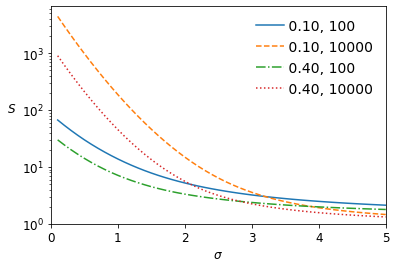

In [37]:
slope_plot(data='maxsum.scheduling.dupsplit.arc_distribution_zero', vs='maxmax', q_set=[0.1,0.4], n_set=[100,10000])

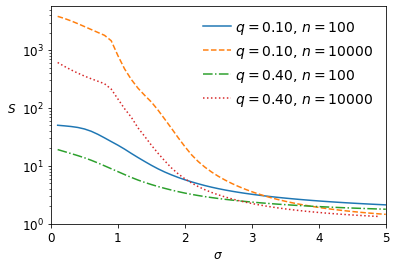

In [265]:
slope_plot(data='maxsum.scheduling.dupsplit.arc_distribution_exponential', vs='maxmax', q_set=[0.1,0.4], n_set=[100,10000])

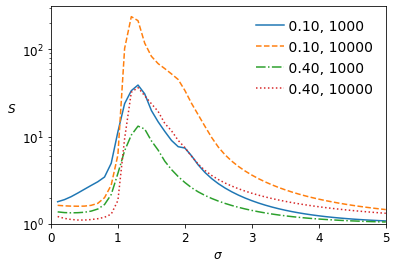

In [43]:
slope_plot(data='maxsum.scheduling.dupsplit.arc_distribution_lognormal.arc_sigma_1', vs='maxmax', q_set=[0.1,0.4], n_set=[1000,10000])

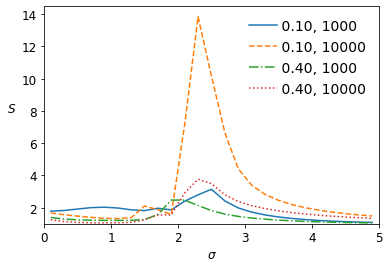

In [44]:
slope_plot(data='maxsum.scheduling.dupsplit.arc_distribution_lognormal.arc_sigma_2', vs='maxmax', q_set=[0.1,0.4], n_set=[1000,10000], yscale='linear')

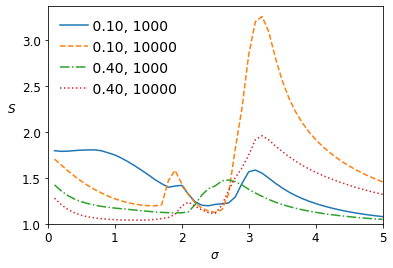

In [44]:
slope_plot(data='maxsum.scheduling.dupsplit.arc_distribution_lognormal.arc_sigma_3', vs='maxmax', q_set=[0.1,0.4], n_set=[1000,10000], yscale='linear', legend_loc='upper left')

# Projects warehouse

In [46]:
model1 = 'tsunami_ln'
model2 = 'tsunami_ln_merger_sum'
warehouse=pd.read_csv('/Users/avazquez/nl/plethora/c/tsunami/warehouse.project_list.by_project.csv')
datalakepath = '/Users/avazquez/nl/data/S3/nl-raw-data-warehouse'
data = []
for project in warehouse.itertuples():
    try:
        f1 = open(datalakepath+'/'+model1+'/'+project.path+'/nl_tsu_mitigation_baseline.json')
        report1 = json.load(f1)
        pass
    except FileNotFoundError:
        continue
    try:
        f2 = open(datalakepath+'/'+model2+'/'+project.path+'/nl_tsu_mitigation_baseline.json')
        report2 = json.load(f2)
        pass
    except FileNotFoundError:
        continue
    p1 = report1['p80']['days']
    p2 = report2['p80']['days']
    data.append([project,project.path,p1,p2]) 
df_p80 = pd.DataFrame(data, columns = ['project', 'schedule', 'p1', 'p2'])

In [47]:
df_p80.sort_values(by='p2', ascending=False)

,project,schedule,p1,p2
230,"(230, HS2/CP2.1_East_Leg, HS2/CP2.1_East_Leg/Q...",tenant=HS2/schedule=CP2.1_East_Leg/version=QSR...,6671,22646
7,"(7, Aabar/Shams_Abu_Dhabi_Tower, Aabar/Shams_A...",tenant=Aabar/schedule=Shams_Abu_Dhabi_Tower/ve...,8916,20053
235,"(235, KSCC/Jahra_Road, KSCC/Jahra_Road/RA212_M...",tenant=KSCC/schedule=Jahra_Road/version=RA212_...,8747,19026
261,"(261, MottMac/Tideway, MottMac/Tideway/Allianc...",tenant=MottMac/schedule=Tideway/version=Allian...,15027,18892
265,"(265, MottMac/Tideway, MottMac/Tideway/Mitigat...",tenant=MottMac/schedule=Tideway/version=Mitiga...,13923,18125
...,...,...,...,...
318,"(318, Vestas/Kalax_SP_52064, Vestas/Kalax_SP_5...",tenant=Vestas/schedule=Kalax_SP_52064/version=...,0,0
268,"(268, MottMac/Tideway, MottMac/Tideway/QSRA_DD...",tenant=MottMac/schedule=Tideway/version=QSRA_D...,0,0
34,"(34, BAM_Nuttall/C03_HIWYS, BAM_Nuttall/C03_HI...",tenant=BAM_Nuttall/schedule=C03_HIWYS/version=...,0,0
92,"(92, BAM_Nuttall/PMDB_Dover Harbour, BAM_Nutta...",tenant=BAM_Nuttall/schedule=PMDB_Dover Harbour...,0,0


In [48]:
df_p80 = df_p80.loc[df_p80.p2<8000]
df_p80['xy'] = df_p80.p1*df_p80.p2
df_p80['x2'] = df_p80.p1*df_p80.p1
slope = df_p80.xy.sum()/df_p80.x2.sum()
print(slope)

1.576911768145741


77.54385964912281


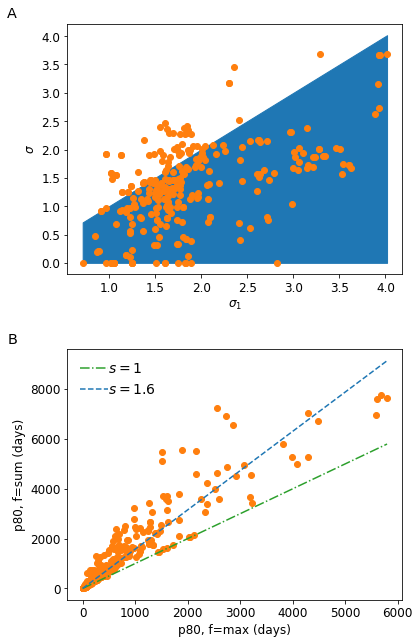

In [54]:
df = pd.read_csv("/Users/avazquez/nl/plethora/c/auxo/data/warehouse.auxo.csv")
dfw = df.loc[df.n_tasks_finished>0]
print(100*dfw.loc[dfw.sigma_duration>dfw.sigma].n_tasks.count()/dfw.shape[0])
fig, ax = plt.subplots(2,1)
x=dfw.sigma_duration
ax[0].fill_between([min(x),max(x)],[0,0],[min(x),max(x)],color='C0')
ax[0].scatter(dfw.sigma_duration,dfw.sigma,label='construction\nprojects',color='C1')
#ax.plot([min(x),max(x)],[min(x),max(x)],'k--',label='y=x')
ax[0].set(xlabel=r'$\sigma_1$',ylabel=r'$\sigma$')
ax[0].set_title('A', loc='left', x=-0.18)
#ax.legend(loc = 'upper left', frameon = 0, handletextpad = 0, fontsize = 14)
ax[1].plot([df_p80.p1.min(),df_p80.p1.max()],[df_p80.p1.min(),df_p80.p1.max()],'-.', color='C2', label=r'$s=1$')
ax[1].plot([df_p80.p1.min(),df_p80.p1.max()],[slope*df_p80.p1.min(),slope*df_p80.p1.max()],'--', color='C0', label=r'$s=1.6$')
ax[1].scatter(df_p80.p1,df_p80.p2, color='C1')
ax[1].set(xlabel='p80, f=max (days)', ylabel='p80, f=sum (days)')
ax[1].set_title('B', loc='left', x=-0.18)
ax[1].legend(frameon = 0, handletextpad = 0, fontsize = 14, loc='upper left')
plt.subplots_adjust(bottom=0, top=2, hspace=0.3)
plt.savefig('/Users/avazquez/av2atgh/red/tex/fig.sigma_vs_sigma1.eps',bbox_inches='tight', facecolor='white', edgecolor='none', dpi=300)

77.54385964912281


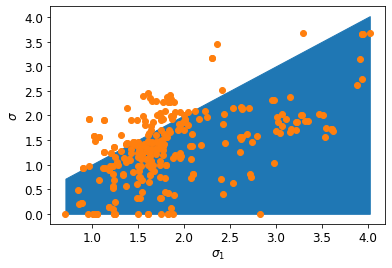

In [36]:
df = pd.read_csv("/Users/avazquez/nl/plethora/c/auxo/data/warehouse.auxo.csv")
dfw = df.loc[df.n_tasks_finished>0]
print(100*dfw.loc[dfw.sigma_duration>dfw.sigma].n_tasks.count()/dfw.shape[0])
fig, ax = plt.subplots()
x=dfw.sigma_duration
ax.fill_between([min(x),max(x)],[0,0],[min(x),max(x)],color='C0')
ax.scatter(dfw.sigma_duration,dfw.sigma,label='construction\nprojects',color='C1')
#ax.plot([min(x),max(x)],[min(x),max(x)],'k--',label='y=x')
ax.set(xlabel=r'$\sigma_1$',ylabel=r'$\sigma$')
#ax.legend(loc = 'upper left', frameon = 0, handletextpad = 0, fontsize = 14)
plt.savefig('/Users/avazquez/av2atgh/red/tex/fig.sigma_vs_sigma1.eps',bbox_inches='tight', facecolor='white', edgecolor='none', dpi=300)

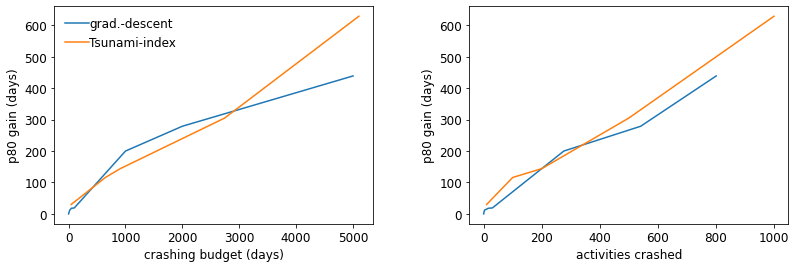

In [106]:
#exp1
gd_p80=np.array([629,623,617,611,610,429,350,190])
gd_bud=np.array([0,10,20,50,100,1000,2000,5000])
gd_nac=np.array([0,1,3,16,30,276,541,801])
ti_p80=np.array([599,513,485,324,0])
ti_bud=np.array([45,647,908,2743,5103])
ti_nac=np.array([10,100,200,500,1000])
fig, ax = plt.subplots(1,2)
ax[0].plot(gd_bud,629-gd_p80,label='grad.-descent')
ax[0].plot(ti_bud,629-ti_p80,label='Tsunami-index')
#ax[0].plot([min(629-gd_p80),max(629-gd_p80)],[min(629-gd_p80),max(629-gd_p80)],'k--')
ax[0].set(xlabel='crashing budget (days)',ylabel='p80 gain (days)')
ax[0].legend(frameon = 0, handletextpad = 0, fontsize = 12, loc='upper left', markerscale=1)
ax[1].plot(gd_nac,629-gd_p80)
ax[1].plot(ti_nac,629-ti_p80)
ax[1].set(xlabel='activities crashed',ylabel='p80 gain (days)')
plt.subplots_adjust(left=0, right=1.7, wspace=0.3)

In [120]:
df=pd.read_csv('/Users/avazquez/nl/plethora/c/tsunami/a.csv')
df.b.sum()

3190

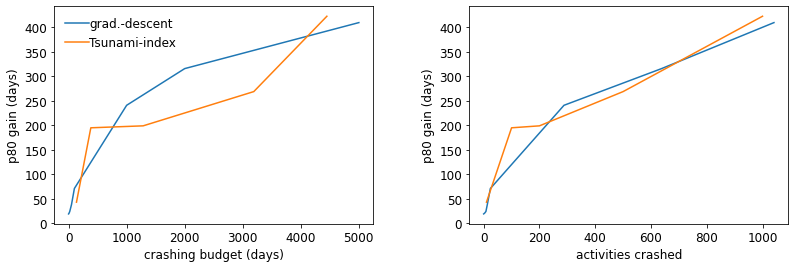

In [116]:
#exp2
gd_bud=np.array([0,10,20,50,100,1000,2000,5000])
gd_p80=np.array([610,608,605,591,558,388,313,219])
gd_nac=np.array([0,4,8,13,24,288,638,1041])
ti_p80=np.array([586,434,430,360,206])
ti_bud=np.array([136,383,1284,3190,4449])
ti_nac=np.array([10,100,200,500,1000])
fig, ax = plt.subplots(1,2)
ax[0].plot(gd_bud,629-gd_p80,label='grad.-descent')
ax[0].plot(ti_bud,629-ti_p80,label='Tsunami-index')
#ax[0].plot([min(629-gd_p80),max(629-gd_p80)],[min(629-gd_p80),max(629-gd_p80)],'k--')
ax[0].set(xlabel='crashing budget (days)',ylabel='p80 gain (days)')
ax[0].legend(frameon = 0, handletextpad = 0, fontsize = 12, loc='upper left', markerscale=1)
ax[1].plot(gd_nac,629-gd_p80)
ax[1].plot(ti_nac,629-ti_p80)
ax[1].set(xlabel='activities crashed',ylabel='p80 gain (days)')
plt.subplots_adjust(left=0, right=1.7, wspace=0.3)